# NUPAT AI Fellowship – Stage Two Case Study

**Author:** Your Name  
**Date:** December 2025  

This notebook analyzes trading and user activity data to extract market insights,
detect potentially fraudulent behavior, and propose strategic recommendations.


### Imports & Load Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

trades = pd.read_csv("../data/trades.csv")
activity = pd.read_csv("../data/user_activitycsv.csv")


In [19]:
# Convert Timestamps
trades["timestamp"] = pd.to_datetime(trades["timestamp"], unit="s")
activity["timestamp"] = pd.to_datetime(activity["timestamp"], unit="s")


In [21]:
print("Data Loaded Successfully!")
trades.head()

Data Loaded Successfully!


,pair,amount,volume,side,timestamp,user_id
0,AAVENGN,500.26,0.001222,buy,2024-12-03 01:42:07.072672+00:00,541-1561-1521-1561-148
1,ADANGN,889.20,0.500000,sell,2024-12-02 11:29:56.860014+00:00,491-1541-1521-1571-156
2,ADANGN,30653.12,17.100000,sell,2024-11-30 05:25:49.991660+00:00,1021-1481-1521-1561-1100
3,ADANGN,1978.36,1.100000,sell,2024-12-07 07:41:02.191598+00:00,981-1571-1521-1971-151
4,ADANGN,2913.62,1.600000,sell,2024-12-07 21:16:11.791118+00:00,981-1571-1521-1971-151


## Part 1 – Exploratory Data Analysis & Market Insights

### Market Dynamics
In this section, we convert transaction volumes to a standard USD rate and identify the most active trading pairs.


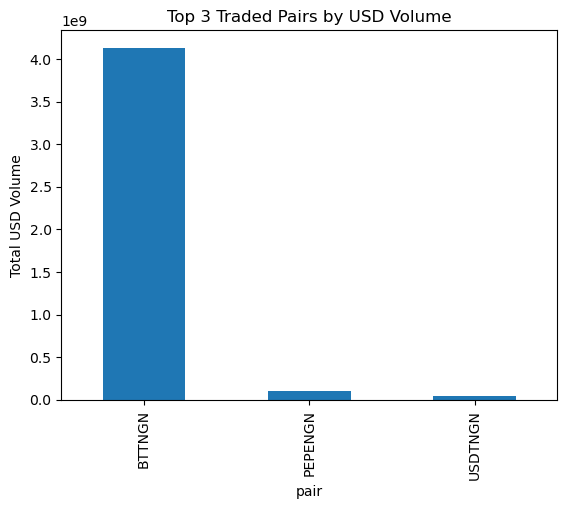

In [25]:
trades["usd_volume"] = trades["amount"] * trades["volume"] / 1500

top_pairs = (
    trades.groupby("pair")["usd_volume"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

top_pairs.plot(kind="bar", title="Top 3 Traded Pairs by USD Volume")
plt.ylabel("Total USD Volume")
plt.show()


### Volatility — BTCNGN

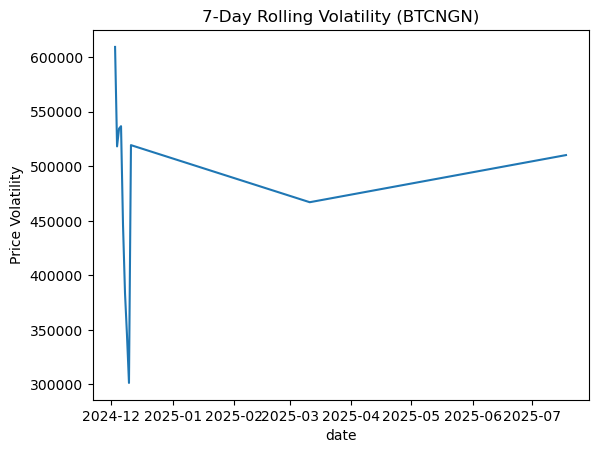

In [27]:
btc = trades[trades["pair"] == "BTCNGN"].copy()
btc["date"] = btc["timestamp"].dt.date

daily_vol = btc.groupby("date")["amount"].std()
rolling_vol = daily_vol.rolling(7).mean()

rolling_vol.plot(title="7-Day Rolling Volatility (BTCNGN)")
plt.ylabel("Price Volatility")
plt.show()


In [28]:
### Deposit Behavior

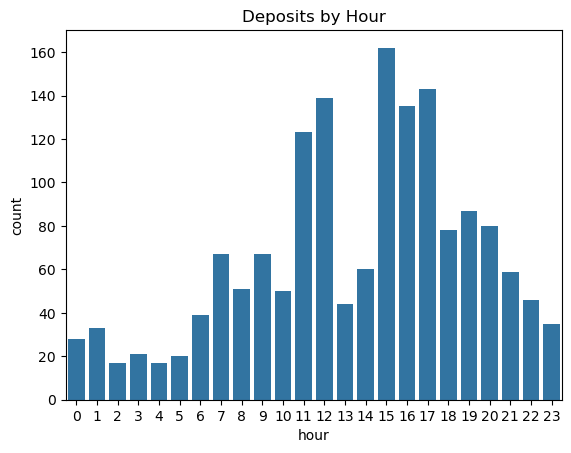

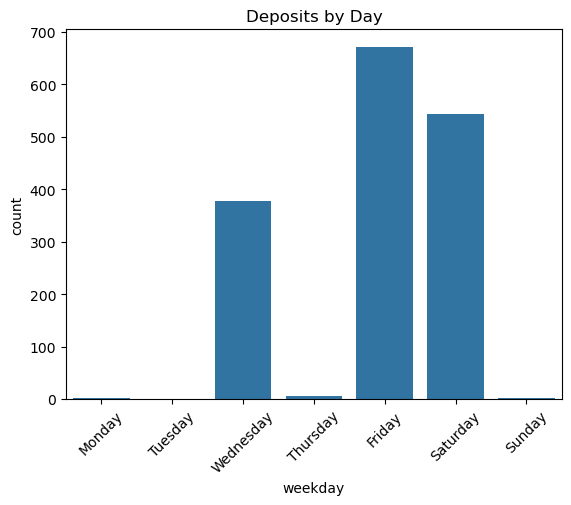

In [29]:
deposits = activity[activity["activity_type"] == "deposit"].copy()
deposits["hour"] = deposits["timestamp"].dt.hour
deposits["weekday"] = deposits["timestamp"].dt.day_name()

sns.countplot(x="hour", data=deposits)
plt.title("Deposits by Hour")
plt.show()

sns.countplot(
    x="weekday",
    data=deposits,
    order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
plt.title("Deposits by Day")
plt.xticks(rotation=45)
plt.show()
